# Math stat hw1 

## Setting

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [2]:
import matplotlib.pyplot as plt

## Task 1

Сумарний обсяг страхових позовiв до компанiї (у млн грн) є нормально розподiленою величиною з параметрами $(120,8^2)$, а сумарний обсяг отриманих
премiй дорiвнює 135 млн грн. 

а) З якою ймовiрнiстю чистий прибуток компанiї
(рiзниця отриманих премiй та позовiв) перевищує 10 млн грн? 

б) Яку найменшу кiлькiсть капiталу потрiбно додатково зарезервувати компанiї, щоб забезпечити виплати за позовами з iмовiрнiстю 99,5 %?

### Solution

$\xi$ -- обсяг страхових позовів, $\xi \sim \mathcal{N} (120, 82)$

**a)** $P (135 - \xi > 10) = P(\xi - 120 < 5) = P\left(\frac{\xi-120}{8} < \frac58\right) = \Phi \left(\frac58\right) $

In [3]:
round(norm.cdf(5/8) * 100, 2)

73.4

**b)** Нехай $x$ -- додатково зарезервовані млн грн 

$P(135 + x - \xi > 0) = P\left(\frac{\xi-120}{8} < \frac{15+x}8\right) = 0.995$

$\frac{15+x}8= \mathcal{z}_{0.995}$

$x = 8 \cdot \mathcal{z}_{0.995} - 15 \approx 5.6$

In [4]:
z = norm.ppf(0.995)
z

2.5758293035489004

In [5]:
x = 8 * z - 15
x

5.606634428391203

## Task 2

Iз прискорювача елементарнi частинки вилiтають у напрямку високого екрану. Горизонтальне вiдхилення кожної частинки вiд центрального положення має нормальний розподiл iз середньоквадратичним вiдхиленням 0,5 м. Яку
мiнiмальну ширину повинен мати екран, щоб 95 % випущених у його напрямку
частинок влучили в нього?

### Solution

$\xi \sim \mathcal{N} (0, 0.5^2)$,  $L = 2l$ -- ширина екрану

$P (\xi \in [-l, l]) = P\left(2\xi \in [2l, 2l]\right) = \Phi (2l) - \Phi (-2l)  = \Phi (2l) - (1 - \Phi(2l)) = 2\Phi (2l) - 1 = 0.95$

$\Phi (2l) = \frac{1.95}2 $

$L = 2l = \mathcal{z}_{1.95/2} \approx 1.96$

In [6]:
L = norm.ppf(1.95/2)

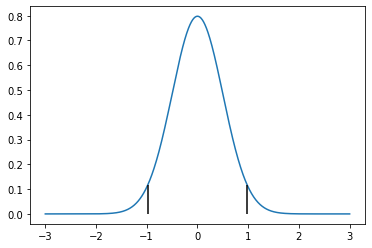

In [7]:
xi = norm(0, 0.5)
x = np.linspace(-3, 3, 1000)
plt.plot(x, xi.pdf(x))
plt.vlines(x=L/2, ymin=0, ymax=xi.pdf(L/2), colors='black')
plt.vlines(x=-L/2, ymin=0, ymax=xi.pdf(-L/2), colors='black')

## Task 3

Об’єм видобуваної компанiєю нафти (у млн барелiв) є нормально розподiленою випадковою величиною з параметрами $(35, 4^2)$, а об’єм замовлень -- незалежною вiд неї нормально розподiленою випадковою величиною з параметрами $(30, 2^2)$.

a) Знайдiть iмовiрнiсть того, що компанiя зможе поставити
замовлену нафту в повному обсязi. 

b) Скiльки нафти компанiя має помiстити у
сховища (додатково до видобування), щоб iмовiрнiсть виконати всi замовлення
дорiвнювала $98\%$?

### Solution

$\xi \sim \mathcal{N} (35, 4^2)$ -- об'єм видобуваної нафти

$\eta \sim \mathcal{N}(30, 2^2)$ -- об'єм замовлень

**a)** $P(\xi > \eta) = P(\xi - \eta > 0)$

$\zeta = \xi - \eta \sim \mathcal{N} (35-30, 4^2 + 2^2) = \mathcal{N} \left(5, (2\sqrt{5})^2\right)$

$P(\zeta > 0) = P(\zeta - 5 > -5) = P\left(\frac{\zeta - 5}{2\sqrt{5}} > -\frac5{2\sqrt{5}}\right) = 1 - \Phi \left(-\frac{\sqrt{5}}{2}\right) = \Phi \left(\frac{\sqrt{5}}2\right) \approx 0.87$

In [8]:
norm.cdf((5 ** 0.5) / 2)

0.8682237613585136

**b)** Нехай $x$ -- нафта у сховищах

$P(\zeta + x > 0) = P\left(\frac{\zeta - 5}{2\sqrt{5}} > -\frac{5+x}{2\sqrt{5}}\right) =\Phi\left(\frac{5+x}{2\sqrt{5}}\right) = 0.98$

$\frac{5+x}{2\sqrt{5}} = \mathcal{z}_{0.98}$

$x = \mathcal{z}_{0.98} \cdot 2\sqrt{5} - 5 \approx 4.18$

In [9]:
z = norm.ppf(0.98)
z

2.0537489106318225

In [10]:
x = z * 2 * 5**0.5 - 5
x

4.184644345777793

## Task 4

Маркетингова компанiя хоче оцiнити, за якою часткою полiсiв автострахування протягом року були позови. Оскiльки страховi компанiї не розкривають цю iнформацiю, компанiя випадково вибрала 200 власникiв полiсiв i дiзналася, що позови були в 16 % з них. 

a) Побудуйте наближений довiрчий iнтервал рiвня 95 % для справжньої частки. 

b) Яким має бути обсяг вибiрки, щоб ширина отриманого довiрчого iнтервалу для частки не перевищувала 0,1?

### Solution

**a)** $\hat{\theta} = 0.16$

$$\theta_{\pm} = \hat{\theta} \pm \mathcal{z}_{1-0.05/2} \sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{n}}  $$

In [11]:
n = 200
t_hat = 0.16

In [12]:
z = norm.ppf(1-0.05/2)
z

1.959963984540054

In [13]:
delta = z * (t_hat * (1 - t_hat) / n)**0.5
t_min = t_hat - delta 
t_max = t_hat + delta 

In [14]:
t_min, t_max, 2*delta

(0.10919192655191055, 0.21080807344808944, 0.1016161468961789)

**b)** 
$$2\mathcal{z} \cdot \sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{n}} < 0.1$$

$$\frac{\hat{\theta}(1-\hat{\theta})}{n} < \left(\frac{0.1}{2z}\right)^2$$

$$n > \frac{4\mathcal{z}^2\hat{\theta}(1-\hat{\theta})}{0.01}$$

In [15]:
import math
n_min = math.ceil(4 * z ** 2 * t_hat * (1-t_hat) / 0.01)
n_min 

207

## Task 5

Використовуючи датасет "Успiшнiсть студентiв": 

а) оцiнiть частку студентiв, якi мають стандартний (standard) ланч; 

б) побудуйте наближений 95 %-й довiр-
чий iнтервал для частки студентiв, якi мають стандартний ланч; 

в) побудуйте наближений 95 %-й довiрчий iнтервал для рiзницi часток студентiв-чоловiкiв
та студентiв-жiнок, якi мають стандартний ланч.

### Solution

In [16]:
students = pd.read_csv('StudentsPerformance.csv', dtype={'math score': int, 'reading scire': int, 'writing score': int})

In [17]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### **a)**

<AxesSubplot:>

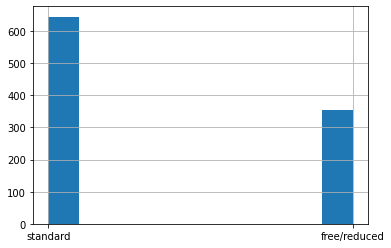

In [18]:
students['lunch'].hist()

In [19]:
th = (students['lunch'] == 'standard').mean()
th

0.645

#### **b)**

In [20]:
z = norm.ppf(1-0.05/2)
n = students.shape[0]
n, z

(1000, 1.959963984540054)

In [24]:
delta = z * (th * (1 - th) / n)**0.5
t_min = round(th - delta, 2)
t_max = round(th + delta, 2)

In [25]:
t_min, t_max

(0.62, 0.67)

#### **c)**

$p_i$ -- ймовірність мати стандартний ланч за умови, що особа чоловік ($i=1$) або жінка ($i=2$)

$\hat{p}_i$ -- оцінка циї ймовірностей частотами

$$\hat{p}_i \sim \mathcal{N} \left(p_i, \frac{p_i(1-p_i)}{n_i}\right)$$

$$\hat{p}_1 - \hat{p}_2 \sim \mathcal{N} \left(p_1 - p_2, \frac{p_1(1-p_1)}{n_i} + \frac{p_2(1-p_2)}{n_2}\right)$$

Нехай $\sigma_i^2 = \frac{p_1(1-p_1)}{n_i}$. Тоді

$$\frac{\hat{p}_1 - \hat{p}_2 - (p_1 - p_2)}{\sqrt{\sigma_1^2 + \sigma_2^2}} \sim \mathcal{N} \left(0, 1\right)$$


In [49]:
n1 = (students['gender'] == 'male').sum()
n2 = (students['gender'] == 'female').sum()

In [50]:
p1h = ((students['lunch'] == 'standard') & (students['gender'] == 'male')).sum() / n1
p1h

0.6556016597510373

In [51]:
p2h = ((students['lunch'] == 'standard') & (students['gender'] == 'female')).sum() / n2
p2h

0.6351351351351351

In [52]:
p = p1 - p2
p

0.02046652461590226

In [54]:
delta = z * (p1h * (1 - p1h) / n1 + p2h * (1 - p2h) / n2) ** 0.5
pmin = round(p - delta, 5)
pmax = round(p + delta, 5)

In [55]:
pmin, pmax

(-0.03885, 0.07978)